<div class="alert alert-block alert-success">
    
 # Berkeley- PCMLAI: Module 1
    
 👨‍🏫 **Vikesh K**      
 #️⃣ **OH-01**
  

</div>

# Case Study: Prioritise Product Development work

![grubhub.png](attachment:grubhub.png)


Given the below data which state should we focus our only available product development team on?

Respond with your answer and reasoning. Where you don't have enough data to make a decision, make assumptions and list
them in your response.

**Data Dictionary**

- `total_orders`: online food orders placed on grubhub.com
- `visits`:  the number of unique times people have gone to grubhub.com
- `revenue`: the amount of money we are making

**Company Details**

Grubhub is a part of Just Eat Takeaway.com, a leading global online food delivery marketplace, and features more than 365,000 restaurant partners in over 4,000 U.S. cities.

![image.png](attachment:image.png)

# Loading the Data Set


In [4]:
#1. SOLVE A PROBLEM
#calculate the average revenue per visit for each state:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
                         
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
#use a URL to load data to a DataFrame.
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/online_orders.csv'
df = pd.read_csv(url)


In [27]:
df.info() #Identify the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               724 non-null    datetime64[ns]
 1   state              724 non-null    object        
 2   total_orders       724 non-null    int64         
 3   revenue            724 non-null    float64       
 4   visits             724 non-null    int64         
 5   revenue_per_visit  724 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 34.1+ KB


In [22]:
df = pd.read_csv(url, parse_dates = ['date']) #code to ceonver the date from object data type to date and time data type

In [23]:
df.head()

,date,state,total_orders,revenue,visits
0,2014-01-01,CA,411,10369.53,17633
1,2014-01-02,CA,347,8754.81,15949
2,2014-01-03,CA,522,13170.06,11731
3,2014-01-04,CA,635,16021.05,16728
4,2014-01-05,CA,214,5399.22,12570


In [24]:
df.sample(10)


,date,state,total_orders,revenue,visits
288,2014-04-18,IL,12995,287319.45,95908
283,2014-04-13,IL,13407,296428.77,135494
128,2014-05-09,CA,619,15617.37,18587
609,2014-03-08,IA,27985,7657255.70,2141595
441,2014-03-21,NYC,21450,2286999.00,244639
378,2014-01-17,NYC,16364,713797.68,376631
406,2014-02-14,NYC,13726,983056.12,135076
599,2014-02-26,IA,23739,6258075.18,2177485
54,2014-02-24,CA,803,20259.69,22088
570,2014-01-28,IA,29646,6955544.52,3149489


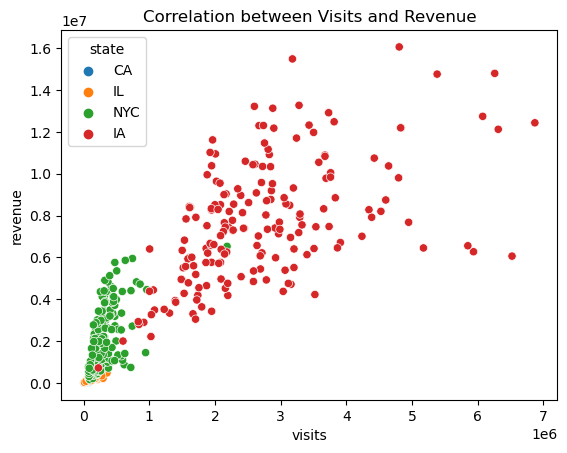

In [25]:
#2. LEARN THE HYPOTHESIS
#What should we learn in the data
    #Duplication
    #Missing values
    #Column Types: maybe change it
    #Shape of the data
    #Overall Size
    #Negative Revenue
#whether higher visits correlate with higher revenue

# Plot correlation between visits and revenue
sns.scatterplot(data=df, x='visits', y='revenue', hue='state')
plt.title('Correlation between Visits and Revenue')
plt.show()

In [26]:
# Calculate average revenue per visit for each state
df['revenue_per_visit'] = df['revenue'] / df['visits']
average_revenue_per_visit = df.groupby('state')['revenue_per_visit'].mean()
print(average_revenue_per_visit)

state
CA    0.77
IA    3.07
IL    2.20
NYC   7.23
Name: revenue_per_visit, dtype: float64


In [8]:
# Calculate correlation coefficient
correlation = df[['visits', 'revenue']].corr()
print(correlation)

         visits  revenue
visits     1.00     0.88
revenue    0.88     1.00


In [9]:
#3. ANSWER BUSINESS QUESTIONS
#How to develop a high level understanding of the data .describe()
    #Total Revenue
    #Total Visit
    #Total Orders
       #State level
    #AOV, AVV
#For example, finding the day with the highest number of orders in California:

# Filter data for California
ca_data = df[df['state'] == 'CA']

# Find the day with the highest number of orders
max_orders_day = ca_data.loc[ca_data['total_orders'].idxmax()]
print(max_orders_day)

date                 2/14/2014
state                       CA
total_orders               968
revenue               24422.64
visits                   27334
revenue_per_visit         0.89
Name: 44, dtype: object


In [16]:
#4. IDENTIFY TRENDS
#How woul dyou drill down into the details
#What questions would you like to answer
#How would you aproach it numerrically and graphically?
    #State with Visits and low Revenue
    #Reveneu, Visits, and Order trends
    #Peak and non peak of the data
    #Seasonality
df.info()
#Note that the Date was converted from data type Object to Datatime


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               724 non-null    datetime64[ns]
 1   state              724 non-null    object        
 2   total_orders       724 non-null    int64         
 3   revenue            724 non-null    float64       
 4   visits             724 non-null    int64         
 5   revenue_per_visit  724 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 34.1+ KB


In [18]:
df.isna().sum()

date                 0
state                0
total_orders         0
revenue              0
visits               0
revenue_per_visit    0
dtype: int64

In [19]:
df.isna().mean()

date                0.00
state               0.00
total_orders        0.00
revenue             0.00
visits              0.00
revenue_per_visit   0.00
dtype: float64

In [20]:
df.isnull().sum()

date                 0
state                0
total_orders         0
revenue              0
visits               0
revenue_per_visit    0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [ ]:
#monthly revenue trends:
# Convert date column FROM ONBJECT TO to DATETIME
df['date'] = pd.to_datetime(df['date'])

# Group by month and state to find monthly revenue
monthly_revenue = df.groupby([df['date'].dt.to_period('M'), 'state'])['revenue'].sum().unstack()
monthly_revenue

In [12]:
#5. MAKE THE CORRECT DATA FORMS
#To clean and format the data correctly, such as handling missing values or incorrect data entries:
# Check for missing values
print(df.isnull().sum())

# Fill missing values or correct data types
df['revenue'] = df['revenue'].replace('to', '').astype(float)
df.fillna(0, inplace=True)

date                 0
state                0
total_orders         0
revenue              0
visits               0
revenue_per_visit    0
dtype: int64


In [29]:
df. groupby('state').describe().T
#Summary of the data by State.  Group By does a Split>Apply>Combine

state                                     CA                   IA  \
date              count                  181                  181   
                  mean   2014-04-01 00:00:00  2014-04-01 00:00:00   
                  min    2014-01-01 00:00:00  2014-01-01 00:00:00   
                  25%    2014-02-15 00:00:00  2014-02-15 00:00:00   
                  50%    2014-04-01 00:00:00  2014-04-01 00:00:00   
                  75%    2014-05-16 00:00:00  2014-05-16 00:00:00   
                  max    2014-06-30 00:00:00  2014-06-30 00:00:00   
                  std                    NaN                  NaN   
total_orders      count               181.00               181.00   
                  mean                568.10             25481.33   
                  min                 164.00              3254.00   
                  25%                 441.00             19884.00   
                  50%                 574.00             26080.00   
                  75%                 700.00             30204.00   
                  max                 968.00             44035.00   
                  std                 175.90              7522.04   
revenue           count               181.00               181.00   
                  mean              14333.15           7672617.57   
                  min                4137.72            721151.48   
                  25%               11126.43           5716969.92   
                  50%               14482.02           7448461.74   
                  75%               17661.00           9521290.74   
                  max               24422.64          16056648.30   
                  std                4438.03           2888023.31   
visits            count               181.00               181.00   
                  mean              19908.39           2704941.31   
                  min                4156.00            224163.00   
                  25%               14349.00           1924693.00   
                  50%               18568.00           2577243.00   
                  75%               23278.00           3240419.00   
                  max               67643.00           6868946.00   
                  std                8759.93           1206855.15   
revenue_per_visit count               181.00               181.00   
                  mean                  0.77                 3.07   
                  min                   0.30                 0.93   
                  25%                   0.61                 2.27   
                  50%                   0.78                 3.03   
                  75%                   0.92                 3.65   
                  max                   1.29                 6.37   
                  std                   0.21                 1.05   

state                                     IL                  NYC  
date              count                  181                  181  
                  mean   2014-04-01 00:00:00  2014-04-01 00:00:00  
                  min    2014-01-01 00:00:00  2014-01-01 00:00:00  
                  25%    2014-02-15 00:00:00  2014-02-15 00:00:00  
                  50%    2014-04-01 00:00:00  2014-04-01 00:00:00  
                  75%    2014-05-16 00:00:00  2014-05-16 00:00:00  
                  max    2014-06-30 00:00:00  2014-06-30 00:00:00  
                  std                    NaN                  NaN  
total_orders      count               181.00               181.00  
                  mean              11095.65             16334.57  
                  min                1507.00              4300.00  
                  25%                7281.00             12073.00  
                  50%               10198.00             16435.00  
                  75%               14594.00             20116.00  
                  max               26249.00             34801.00  
                  std                5192.89              5959.35  
revenue       